# 1. Tire Model

In [1]:
import racesim

The tyre can be characterised by defining a number of parameters

In [2]:
soft = racesim.Tire(time0 = 78, # Laptime at lap 0
                    degradation= 0.2, # Time increase per lap
                    max_laps = 20, # Maximum number of laps before tire is killed
                    name = "soft") 

print(f"Tire: {soft}")

Tire: ('soft', 78, 0.2, 20)


We can see how the laptime will change at different stint laps.

In [3]:
# First tire laptime 
lap_stint = 0
time, is_done  = soft.laptime(lap_stint=lap_stint)

print(f"Laptime for stint lap {lap_stint}: {time}")
print(f"Is stint killed?: {is_done}")

Laptime for stint lap 0: 78.0
Is stint killed?: False


In [8]:
# Laptime after 19 laps
lap_stint = 19
time, is_done  = soft.laptime(lap_stint=lap_stint)

print(f"Laptime for stint lap {lap_stint}: {time}")
print(f"Is stint killed?: {is_done}")

Laptime for stint lap 19: 81.8
Is stint killed?: False


In [10]:
# Laptime after 21 laps: The tire is killed and laptime is modelled as the tire has a puncture
lap_stint = 21
time, is_done  = soft.laptime(lap_stint=lap_stint)

print(f"Laptime for stint lap {lap_stint}: {time}")
print(f"Is stint killed?: {is_done}")

Laptime for stint lap 21: 90.0
Is stint killed?: True


# 2. Race Simulation

In [ ]:
import racesim

Let's define three different tires: Soft, Medium and Hard.

In [12]:
soft = racesim.Tire(78, 0.2, 20, "soft")
medium = racesim.Tire(79.6, 0.09, 37, "medium")
hard = racesim.Tire(80.8, 0.04, 50, "hard")

To define a race simulation, we have to create an instance of `RaceSim` with the number of laps

In [13]:
laps = 65
race = racesim.RaceSim(laps)

Now, we can run the simulation with the following configuration:
- `tire0`: Initial tire
- `lap_pit`: A list with the lap pits
- `tire_pit`: A list with the tires to be used after the pitstops

*Note: set `print_laps=True` to print the lap times and the plot of the times*

In [27]:
result = race.simulate(tire0 = soft, 
              lap_pit = [19,47], 
              tire_pit = [medium, soft],
              print_laps = False)

print(f"Race time: {result} secods")


Race time: 5253.619999999999 secods


# 3. Race Strategy Optimization

In [1]:
import racesim

In [2]:
soft = racesim.Tire(78, 0.2, 20, "soft")
medium = racesim.Tire(79.6, 0.09, 37, "medium")
hard = racesim.Tire(80.8, 0.04, 50, "hard")
                 
laps = 65

race = racesim.RaceSim(laps)

If we want to start the race with soft and make only one pitstop:

In [6]:
results = race.optimize(tire0 = soft, 
                        tires_available=[soft, medium, hard], 
                        pit_stops=1)
print(f"Best lap time: {results[2]}")
print(f"Best laps to stop: {results[0]}")
print(f"Best tires to put: {results[1]}")

Best lap time: 5293.039999999997
Best laps to stop: (22,)
Best tires to put: (hard,)


In case of two pitstops:

In [7]:
results = race.optimize(tire0 = soft, 
                        tires_available=[soft, medium, hard], 
                        pit_stops=2)
print(f"Best lap time: {results[2]}")
print(f"Best laps to stop: {results[0]}")
print(f"Best tires to put: {results[1]}")

Best lap time: 5252.999999999999
Best laps to stop: (21, 46)
Best tires to put: (medium, soft)


# 4. Miscellaneous

The following code shows, for a one-stop strategy, the final time for every possible lap to pit and the tire to use after the pitstop.

In [12]:
import racesim

import numpy as np
import matplotlib.pyplot as plt

In [13]:
soft = racesim.Tire(78, 0.2, 20, "soft")
medium = racesim.Tire(79.6, 0.09, 37, "medium")
hard = racesim.Tire(80.8, 0.04, 50, "hard")
                 
laps = 65

race = racesim.RaceSim(laps)

In [14]:
x = np.arange(1, laps+1)

y1 = [race.simulate(soft, [i], [hard]) for i in x]
y2 = [race.simulate(soft, [i], [medium]) for i in x]
y3 = [race.simulate(soft, [i], [soft]) for i in x]

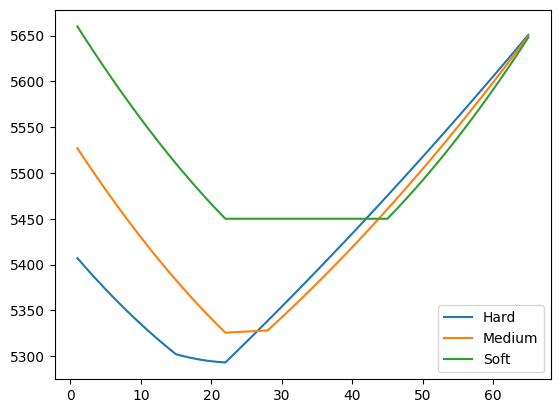

In [15]:
plt.plot(x, y1, label="Hard")
plt.plot(x, y2, label="Medium")
plt.plot(x, y3, label="Soft")
plt.legend()
plt.show()